# Finding the Best Markets to Advertise In

In this guided project, we make one step further and learn to combine some of these skills to perform practical data analysis. Moreover, we'll also make use of what we learned in the first course.

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. <b>Our goal in this project is to find out the best two markets to advertise our product in.</b>

In [1]:
# import libraries we need
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Understanding the Data

In [2]:
# read in file into dataframe
fcc_2017 = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
# check the rows and columns of data
fcc_2017.shape

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18175, 136)

In [3]:
# to avoid truncated columns
pd.options.display.max_columns = 136

# print the first 5 rows
fcc_2017.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

##### Why we're using a ready-made dataset instead of organizing a survey
The columns of [raw data](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/raw-data) are too long, for example, "Are you already working as a software developer?". If we rename columns manually, it will be time-consuming and it's better to use cleaned data for practice purpose.

##### What's this dataset about?
This open dataset is from freeCodeCamp's 2017 survey and they were collected from over 20,000 developers for us to understand background, experience in coding, money spent for learning coding per month, etc. 

##### Where can this dataset be download?
It can be downloaded from [Quincy Larson's github](https://github.com/freeCodeCamp/2017-new-coder-survey)

### Checking for Sample Representativity

As we mentioned earlier, most of our company's courses are on web and mobile development, but we also cover other domains, like data science and game development. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before we start analyzing, let's figure out if this data is representative for our purpose.

In [4]:
# generate the frequency distribution table for JobRoleInterest column
table = fcc_2017["JobRoleInterest"].value_counts(normalize=True)*100

# review the first 20
table.head(20) 

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

Take a look into the distributions of job interest column, we'll know some people have multiple interests.

- A lot of people are interested in web development(`Full-Stack Web Developer`, `Front-End Web Developer` and `Back-End Web Developer`)
- A few people are interested in mobile developement.
- A few people are interested in domains other than web & mobile development.

It is interesting that people are interested in more than one subject. It'd be a better picture of how many people have only one interested subject and how many have multiple interested subjects.

- Split each string in the JobRoleInterest column to find the number of options for each participant.
  - We'll first drop the null values because we can't split Nan values.
- Generate a frequency table for the variable describing the number of options.

In [5]:
# drop null values and split each interest for counting
interest_nonull = fcc_2017["JobRoleInterest"].dropna()
splited_interest = interest_nonull.str.split(',')

# count the number of interest and generate a distribution 
# in percentage
interest_count = splited_interest.apply(lambda x:len(x))
interest_count.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We can find that only 31% students have clear idea about what programing filed they'd like to participate in. Majority of students have mixed interests. Given that we offer various courses subjects, it's not a bad news for us if students have mixed interests.

We want to look deeper how many people are interested in courses of `Web Development` and `Mobile Development`.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


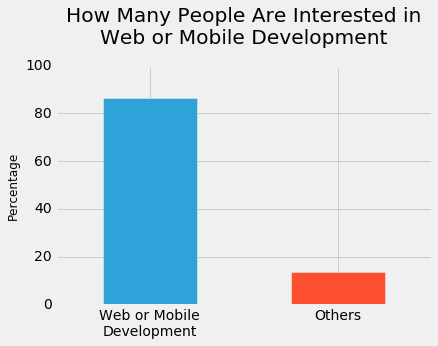

In [6]:
# filter interest_nonull to check if it contains keyword of
# web or mobile developer
# make frequency table in percentage 
web_or_mobile=interest_nonull.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

# make a bar plot to in fivethirtyeight style
plt.style.use('fivethirtyeight')

freq_table.plot.bar(rot=0)
plt.title('How Many People Are Interested in\nWeb or Mobile Development', 
          y=1.07) # move title position a little upward
plt.ylabel('Percentage',fontsize=12) # increase size of y label for better visualization
plt.xticks([0,1],['Web or Mobile\nDevelopment','Others']) # update x label name
plt.ylim([0,100])
plt.show()

It turns out that most of people (roughly 86%) are interested in either web or mobile development. This result offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming courses but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

We'll work with `CountryLive` column because we're interested where people actually live at the moment when we run the ads.

Because the data provides information at a country level, we think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers - the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [7]:
# make sure we're working with representative sample
# drop all the rows where participants didn't answer 
# what role they're interested in

fcc_good = fcc_2017[fcc_2017['JobRoleInterest'].notnull()].copy()

# generate a frequency table for the `CountryLive` variable
# in both absolute and relative frequencies
abs_freq = fcc_good['CountryLive'].value_counts()
relative_freq = fcc_good['CountryLive'].value_counts(normalize=True)*100


# display the frequency in a more readable format
pd.DataFrame({'Absolute Frequencies':abs_freq, 
              'Relative Frequencies(%)':round(relative_freq,2)}
            )


,Absolute Frequencies,Relative Frequencies(%)
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


45.7% of our potential customers are located in United States, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7% which is not far from UK(4.6%) and Canada(3.8%).

This is a useful information, but we need to go deeper and find out how much people are willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

It seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom and Canada. Two reasons for this decision are:
- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [8]:
# we'd like to calculate money for learning per month
# replace 0 month with 1 to avoid dividing by 0
fcc_good["MonthsProgramming"].replace(0,1, inplace=True)

# create a new column that describes the amount of money
# a student has spent per month.
fcc_good["money_per_month"]=fcc_good["MoneyForLearning"] / fcc_good["MonthsProgramming"]
# find out how many null values in the new column
fcc_good["money_per_month"].isnull().sum()

675

Since there're 18175 data, removing 675 null data won't cause great impact on analysis. Keep only the rows that are not null values in the new column.

In [9]:
fcc_good = fcc_good[fcc_good["money_per_month"].notnull()]

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [10]:
# keep rows where CountryLive column are not null values
fcc_good = fcc_good[fcc_good["CountryLive"].notnull()]

# make sure if we still have enough data
fcc_good["CountryLive"].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

#### Mean

In [11]:
# group fcc_good by CountryLive and get mean values
countries_mean = fcc_good.groupby("CountryLive").mean()
four_countries = ["United States of America","India","United Kingdom", "Canada"]
# filter the money_per_month data and 4 countries
countries_mean["money_per_month"][four_countries].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

The highest mean value is USA, followed by India, Canada and United Kingdom. Given the statistics of GDP per person in 2018 is as below: USA($62794), Canada($46232), UK($42943) and India($2009), we have to highly suspect that average spending for learning per month values are affected by some outliers no matter extremly low or high.

We have to investigate deeper if there's some data affecting the result, if so, we need to get rid of outliers to make proper determinations for advertising project.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


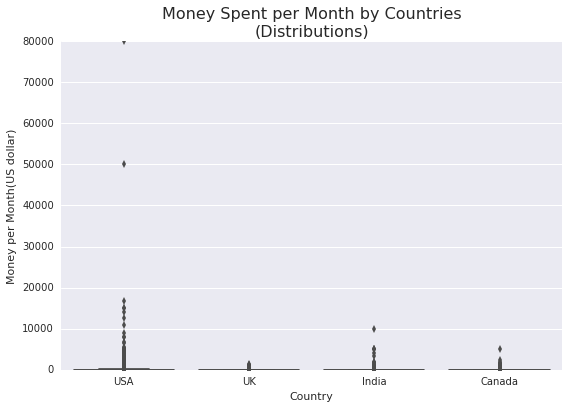

In [12]:
# We only focus on data from 4 countries
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

import seaborn as sns
# make a box-and-whisker plot with seaborn
sns.boxplot(y="money_per_month", x="CountryLive",
           data=only_4)
plt.title("Money Spent per Month by Countries\n(Distributions)", 
          fontsize=16)
plt.xlabel("Country")
plt.ylabel("Money per Month(US dollar)")
plt.xticks(range(4),["USA","UK","India","Canada"])
plt.show()

It's hard to see on the plot above if there's anything wrong with the data, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so it's safer for us to remove every value that goes over \$20,000 per month.

In [13]:
# eliminate outliers first time
only_4 = only_4[only_4["money_per_month"]<20000]

Now let's recompute the mean and distribution.

In [14]:
# compute again the mean values of 4 countries
countries_mean = only_4.groupby("CountryLive").mean()

countries_mean["money_per_month"][four_countries].sort_values(ascending=False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


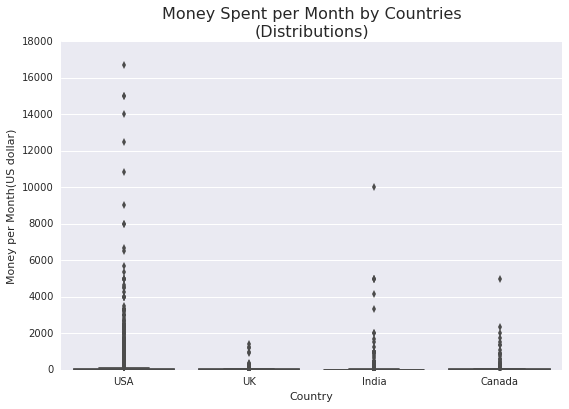

In [15]:
# check if there's still outlier affecting mean values
sns.boxplot(y="money_per_month", x="CountryLive",
           data=only_4)
plt.title("Money Spent per Month by Countries\n(Distributions)", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Money per Month(US dollar)")
plt.xticks(range(4),["USA","UK","India","Canada"])
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month) and one in Canada, but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [18]:
# inspect outliers for India
# check manually if they attend some expensive bootcamp
india_outlier = only_4[
    (only_4["CountryLive"]=="India") & 
    (only_4["money_per_month"]>2500)
]

india_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,...,in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,...,no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 m

Among 6 data, none of them attended bootcamp which will be the reason they spent money more than $2500 per month. However, we can't be sure based on information we hold whether they truly spend so much money per month or they misunderstood the university intuition is included. For analysis, it's safer for us to remove these 6 rows.

In [19]:
# remove india outliers
only_4 = only_4.drop(india_outlier.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). Let's examine these participants in more detail.

In [20]:
us_outlier = only_4[
    (only_4["CountryLive"]=="United States of America") &
    (only_4["money_per_month"]>6000)
]

us_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,...,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,...,in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,...,in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,bachelor's degree,

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported that they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code cell, we'll remove respondents that:

- Didn't attend bootcamps.
- Had only been programming for three months or less when at the time they completed the survey.

In [21]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had only been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)



From the box plot, we found there's one suspecious data for Canada.
We set the outlier value to be 4000 and check the `AttendedBootcamp` and `MonthsProgramming` columns.

In [23]:
canada_outlier = only_4[
    (only_4["CountryLive"]=="Canada") &
    (only_4["money_per_month"]>4000)
]

canada_outlier[["AttendedBootcamp","MonthsProgramming","money_per_month"]]

,AttendedBootcamp,MonthsProgramming,money_per_month
13659,1.0,2.0,5000.0


In [24]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outlier.index)

##### Time to Recompute the Mean of Money Spent per Month by these 4 Countries

In [25]:
# After cleaning, make a table of mean value in sorted order again
only_4.groupby("CountryLive").mean()["money_per_month"].sort_values(ascending=False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


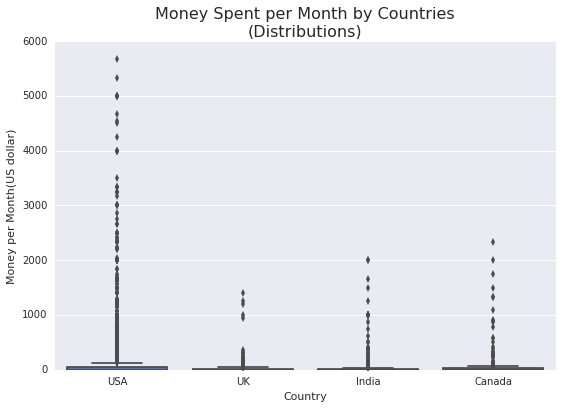

In [26]:
# make a bar plot to confirm if we can make a conclusion
# that USA & Canada is the best country for advertisement.
sns.boxplot(y="money_per_month", x="CountryLive",
           data=only_4)
plt.title("Money Spent per Month by Countries\n(Distributions)", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Money per Month(US dollar)")
plt.xticks(range(4),["USA","UK","India","Canada"])
plt.show()

### Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

- $59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
- We have almost twice as more potential customers in India than we have in Canada:

In [27]:
# Frequency table for the 'CountryLive' column after cleaning outliers
only_4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64


So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

- 60% for the US, 25% for India, 15% for Canada.
- 50% for the US, 30% for India, 20% for Canada; etc.

Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

- 70% for the US, and 30% for India.
- 65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

In [55]:
USA_money = 142.654608
Canada_money = 93.065400
India_money = 65.758763

USA_pop = 74.967908
India_pop = 11.732991
Canada_pop = 6.136072

USA = USA_money*USA_pop
India = India_money*India_pop
Canada = Canada_money * Canada_pop

# option 1: 60% for the US, 25% for India, 15% for Canada
option_1 = 0.6*USA + 0.25*India + 0.15*Canada

# option_2: 50% for the US, 30% for India, 20% for Canada
option_2 = 0.5*USA + 0.3*India + 0.2*Canada

# option_3: 70% for the US, and 30% for India
option_3 = 0.7*USA + 0.3*India
    
# option_4: 65% for the US, and 35% for Canada
option_4 = 0.65*USA + 0.35*Canada

# option_5: Advertise only in the US.
option_5 = 1*USA

# print the answer
for i in [option_1,option_2,option_3,option_4,option_5]:
    print(round(i,2))

6695.26
5692.93
7717.63
7151.31
10694.52


### Conclusion
After analyzed this survey, we can only be sure USA is the best market to advertise since the potential population and money willing to spend for learning are the most. Based on the 5 options calculated above, advertise only in the USA seems to be the best decision. But we can't be 100% sure if this sample is highly representative for population. To avoid mislead by sample, it's better to lower our risk by choosing another country to advertise in.

Although sample shows Canadian(\$93) are willing to spend more money than Indian people(\$65), the amount of Indian(11%) is more than Canadian(6%). Excluding option 5, it seems like option_3 - 70% USA & 30% India can make more money. This will be our recommendation to our marketing team.